# 1.출생 및 사망 통계

> 1.출생 및 사망 통계
>>	- 출생자수가 가장 많은 년도와 출생자수를 구하세요.  
>>	- 사망자수가 가장 많은 년도와 사망자수를 구하세요.  
>>	- 사망자수가 출생자수를 추월한 연도는?  

> 컬럼명을 바꾸세요
>>	연도 (년)  >> 연도  
	출생자수(명) >> 출생자수  
	사망자수(명) >> 사망자수    

- x축은 연도, y축은 출생자수 가 있는 그래프를 작성하세요  

- 1945년~1955년까지 출생자수와 사망자수의 그래프를 작성하고, 저장하세요.  

In [53]:
import pandas as pd
url = 'https://ko.wikipedia.org/wiki/%EB%8C%80%ED%95%9C%EB%AF%BC%EA%B5%AD%EC%9D%98_%EC%9D%B8%EA%B5%AC'
df = pd.read_html(url)
df = df[4]
df.head()

,연도 (년),추계인구(명),출생자수(명),사망자수(명),자연증가수(명),조출생률 (1000명당),조사망률 (1000명당),자연증가율 (1000명당),합계출산율
0,1925,12997611,558897,359042,199855,43.0,27.6,15.4,6.59
1,1926,13052741,511667,337948,173719,39.2,25.9,13.3,NaN
2,1927,13037169,534524,353818,180706,41.0,27.1,13.9,NaN
3,1928,13105131,566142,357701,208441,43.2,27.3,15.9,NaN
4,1929,13124279,566969,414366,152603,43.2,31.6,11.6,NaN


In [54]:
df.nlargest(1,'출생자수(명)')[['연도 (년)','출생자수(명)']]

,연도 (년),출생자수(명)
35,1960,1080535


In [5]:
df.nlargest(1,'사망자수(명)')

,연도 (년),추계인구(명),출생자수(명),사망자수(명),자연증가수(명),조출생률 (1000명당),조사망률 (1000명당),자연증가율 (1000명당),합계출산율
25,1950,19211386,633976,597474,36502,33.0,31.1,1.9,5.05


In [6]:
df.rename(columns = {'연도 (년)':'연도','출생자수(명)':'출생자수','사망자수(명)':'사망자수'}, inplace=True)

<AxesSubplot:xlabel='연도'>

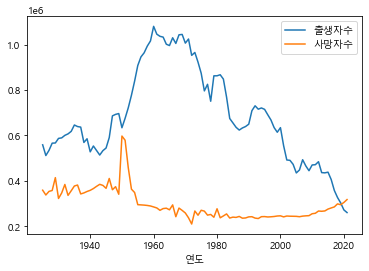

In [11]:
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')

df[['연도','출생자수','사망자수']].set_index('연도').plot()

<AxesSubplot:xlabel='연도'>

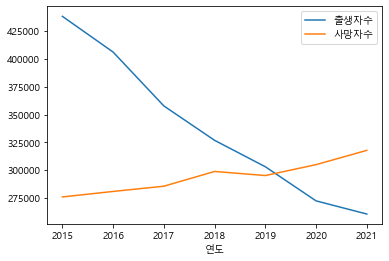

In [15]:
df[['연도','출생자수','사망자수']].set_index('연도').loc[2015:].plot()

In [18]:
dfnew = df[['연도','출생자수','사망자수']].set_index('연도')
dfnew

,출생자수,사망자수
연도,,
1925,558897,359042
1926,511667,337948
1927,534524,353818
1928,566142,357701
1929,566969,414366
...,...,...
2017,357771,285534
2018,326822,298820
2019,303054,295132


In [20]:
dfnew[dfnew['출생자수']  < dfnew['사망자수']]

,출생자수,사망자수
연도,,
2020,272337,304948
2021,260494,317773


In [21]:
dfnew

,출생자수,사망자수
연도,,
1925,558897,359042
1926,511667,337948
1927,534524,353818
1928,566142,357701
1929,566969,414366
...,...,...
2017,357771,285534
2018,326822,298820
2019,303054,295132


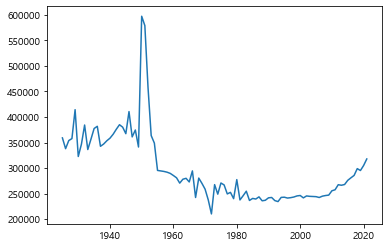

In [22]:
plt.plot(dfnew.index, dfnew['사망자수'])

<AxesSubplot:xlabel='연도'>

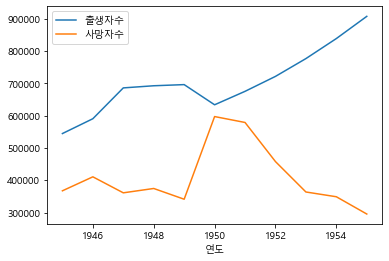

In [26]:
dfnew.loc[1945:1955].plot()

# 2.지역 및 연령별 인구 통계
> 이 순서대로 해보세요. >>>  
	>>Unnamed: 0 를 행정구역으로 바꾸세요.  
	주민등록 인구 컬럼을 삭제하고 행정구역 컬럼을 인덱스로 설정하세요.  
	대전광역시를 세로막대그래프로 작성하세요.

In [37]:
import pandas as pd
url = 'https://ko.wikipedia.org/wiki/%EB%8C%80%ED%95%9C%EB%AF%BC%EA%B5%AD%EC%9D%98_%EC%9D%B8%EA%B5%AC'
local = pd.read_html(url, header = 1) # header = 1
local = local[11]
local.head()

,Unnamed: 0,주민등록 인구,0-9세,10-19세,20-29세,30-39세,40-49세,50-59세,60-69세,70-79세,80-89세,90-99세,100세 이상
0,전국,51671569,3843759,4737829,6733054,6764334,8205797,8591085,7039371,3699044,1790233,256245,10818
1,서울특별시,9558153,599600,764952,1440484,1449434,1497354,1505745,1274190,696452,286511,40954,2477
2,부산광역시,3361781,224799,267659,422488,409975,505116,556481,544644,294713,120274,14876,756
3,대구광역시,2395749,171893,220577,315051,287590,376422,419517,337985,175933,80677,9732,372
4,인천광역시,2937440,221097,271547,394550,400637,480528,508488,388725,178261,80508,12554,545


In [38]:
del local['주민등록 인구']

In [45]:
local.rename(columns={'Unnamed: 0':'행정구역'}, inplace=True)

In [48]:
local.set_index('행정구역', inplace=True)

<AxesSubplot:>

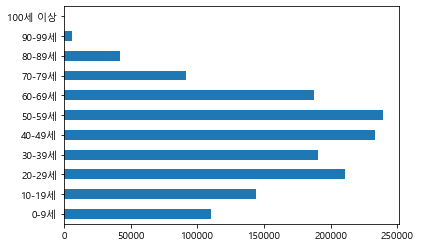

In [51]:
local.loc['대전광역시'].plot(kind='barh')